In [50]:
import numpy as np
import matplotlib.pyplot as plt

DEFINIÇÃO DA CONDIÇÃO DE PARADA

In [13]:
# Recebe um vetor de listas de ponto flutuante A, conforme segue: A = [[1.,2.,3.,...],[4.,5.,6.,...],...], e um inteiro
# i que indica a posição da lista que será trabalhada em relação ao vetor. Para o cálculo do erro relativo, denotado por
# Dr_k, são utilizadas a lista atual e a anterior; quando a lista utilizada se encontra na posição 0, retorna o valor 1

def condicaoDeParada(A, i):
    if i == 0: return 1
    else:
        x = []
        for j in range(len(A[i])): x.append(abs(A[i][j] - A[i-1][j]))
        D_k = max(x)
        Dr_k = D_k/max(A[i])
        return Dr_k

MÉTODO DE JACOBI PARA A SOLUÇÃO DE SISTEMAS LINEARES

In [34]:
# Definição das matrizes utilizadas para o teste do método

# Sistema de exemplo:

# 10*x1 + 2*x2 +  1*x3 =  7
#  1*x1 + 5*x2 +  1*x3 = -8
#  2*x1 + 3*x2 + 10*x3 =  6

# Solução (para precisão 0.05): [0.9994, -1.9998, 0.9984]

A = np.array([[10,2,1],[1,5,1],[2,3,10]])
b = np.array([[7],[-8],[6]])

In [35]:
# Define um critério de convergência para os sistemas aplicados ao método de Jacobi. É importante ressaltar que a não
# convergência por esse critério não garante que o sistema não possa ser resolvido pelo método de Jacobi. Recebe uma
# matriz de coeficientes A

def criterioDasLinhas(A):
    x = []
    
    for i in range(A.shape[0]):
        soma = 0
        for j in range(A.shape[0]):
            if i != j:
                soma = soma + A[i][j]
        x.append(soma/A[i][i])

    if(max(x) < 1):
        return 1 # converge
    else:
        return 0 # não converge

In [42]:
# Teste para o critério de convergência. Imprime o resultado da verificação na tela

if criterioDasLinhas(A) == 1:
    print("O sistema converge para uma solução exata!")
else:
    print("Não é possível definir se o sistema converge para uma solução exata com este método!")

O sistema converge para uma solução exata!


In [39]:
# Recebe uma matriz de coeficientes A, uma matriz de resultados b, e o erro relativo requerido para a aproximação. Toma
# como aproximação inicial o vetor x = [0,0,0,...] e armazena todas as aproximações obtidas em um vetor de listas de
# ponto flutuante X, como segue: X = [[0.1,0.2,0.3,...],[0.4,0.5,0.6,...],...]. Para apenas quando a condicaoDeParada
# retorna o erro relativo requerido ou um erro menor. Deve se assegurar que a matriz de coeficientes gere uma lista
# convergente para que seja executado corretamente

def metodoDeJacobi(A,b,err):
    X = []
    x = []
    for i in range(A.shape[0]): x.append(0)
    X.append(x)
    
    k = 0
    
    while(condicaoDeParada(X,k) > err):
        y = []
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[0]):
                if i != j:
                    sigma = sigma + A[i][j]*X[k][j]
            y.append((1/A[i][i])*(b[i][0] - sigma))
        X.append(y)
        k = k+1
    return X

In [22]:
# Teste do método de Jacobi para a solução de sistemas lineares. Imprime os resultados obtidos em todas as iterações

X = metodoDeJacobi(A,b,0.05)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0].
Iteração 1: [0.70000000000000007, -1.6000000000000001, 0.60000000000000009].
Iteração 2: [0.95999999999999996, -1.8600000000000003, 0.94000000000000006].
Iteração 3: [0.9780000000000002, -1.9800000000000002, 0.96600000000000008].
Iteração 4: [0.99940000000000007, -1.9888000000000003, 0.99840000000000007].


MÉTODO DE GAUSS-SEIDEL PARA SOLUÇÃO DE SISTEMAS LINERARES

In [32]:
# Definição das matrizes utilizadas para o teste do método

# Sistema de exemplo:

# 5*x1 + 1*x2 + 1*x3 = 5
# 3*x1 + 4*x2 + 1*x3 = 6
# 3*x1 + 3*x2 + 6*x3 = 0

# Solução (para precisão 0.05): [1.0075, 0.9912, -0.9993]

C = np.array([[5,1,1],[3,4,1],[3,3,6]])
d = np.array([[5],[6],[0]])

In [40]:
# Recebe uma matriz de coeficientes A, uma matriz de resultados b, e o erro relativo requerido para a aproximação. Toma
# como aproximação inicial o vetor x = [0,0,0,...] e armazena todas as aproximações obtidas em um vetor de listas de
# ponto flutuante X, como segue: X = [[0.1,0.2,0.3,...],[0.4,0.5,0.6,...],...]. Para apenas quando a condicaoDeParada
# retorna o erro relativo requerido ou um erro menor. Deve se assegurar que a matriz de coeficientes gere uma lista
# convergente para que seja executado corretamente

def metodoDeGaussSeidel(A,b,err):
    X = []
    x = []
    for i in range(A.shape[0]): x.append(0)
    X.append(x)
    
    k = 0
    
    while(condicaoDeParada(X,k) > err):
        y = []
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[0]):
                if i != j:
                    if j < len(y):
                        sigma = sigma + A[i][j]*y[j]
                    else:
                        sigma = sigma + A[i][j]*X[k][j]
            y.append((1/A[i][i])*(b[i][0] - sigma))
        X.append(y)
        k = k+1
    return X

In [43]:
# Teste do método de Gauss-Seidel para a solução de sistemas lineares. Imprime os resultados obtidos em todas as
# iterações

X = metodoDeGaussSeidel(C,d,0.05)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0].
Iteração 1: [1.0, 0.75, -0.875].
Iteração 2: [1.0250000000000001, 0.94999999999999996, -0.98749999999999993].
Iteração 3: [1.0075000000000001, 0.99124999999999996, -0.9993749999999999].


INTERPRETAÇÃO GEOMÉTRICA PARA O MÉTODO DE JACOBI

In [44]:
# Definição das matrizes de exemplo:

# Sistema de exemplo:

# 1*x1 + 1*x2 =  3
# 1*x1 - 3*x2 = -3

# Solução (para precisão 0.3): [1.3333, 1.3333]

E = np.array([[1,1],[1,-3]])
f = np.array([[3],[-3]])

In [46]:
# Cálculo das iterações. Cada iteração será representada por um ponto no gráfico

X = metodoDeJacobi(E,f,0.30)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0].
Iteração 1: [3.0, 1.0].
Iteração 2: [2.0, 2.0].
Iteração 3: [1.0, 1.6666666666666665].
Iteração 4: [1.3333333333333335, 1.3333333333333333].


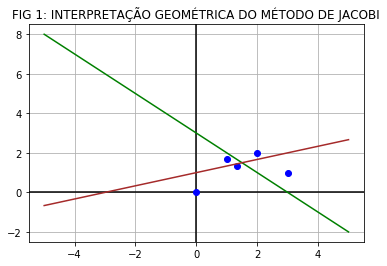

In [51]:
# Gráfico do sistema em comparação com as iterações. O ponto em que as retas se encontram é a solução exata do sistema

x = np.linspace(-5,5)
x1 = 3 - x
x2 = (1/3)*(3 + x)

plt.title("FIG 1: INTERPRETAÇÃO GEOMÉTRICA DO MÉTODO DE JACOBI")
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')

plt.grid(True)
plt.plot([X[0][0],X[1][0],X[2][0],X[3][0],X[4][0]], [X[0][1],X[1][1],X[2][1],X[3][1],X[4][1]], 'ro', color = 'blue')
plt.plot(x, x1, color = 'green')
plt.plot(x, x2, color = 'brown')
plt.show()